In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

#### Uploading Data

In [37]:
data_1 = pd.read_csv('../data/data_1.csv')
data_2 = pd.read_csv('../data/data_2.csv')
data_3 = pd.read_csv('../data/data_5.csv')
data_4 = pd.read_csv('../data/data_6.csv')
data_5 = pd.read_csv('../data/data_7.csv')


#### Merging DFs

In [82]:
frames = [data_1, data_2, data_3, data_4, data_5]
data = pd.concat(frames)    

## EDA

In [27]:
def df_info(df):
    print(f"Data Shape: {df.shape}")
    df_chack = pd.DataFrame(df.dtypes, columns=['dtypes'])
    df_chack = df_chack.reset_index()
    df_chack['name'] = df_chack['index']
    df_chack = df_chack[['name', 'dtypes']]
    df_chack['isnull'] = df.isnull().sum().values
    df_chack['% null'] = round((df_chack['isnull']/len(df))*100,2)
    df_chack['num_unique'] = df.nunique().values
    df_chack['first_value'] = df.values[0]
    return df_chack


df_info(data)

Data Shape: (6488, 40)


,name,dtypes,isnull,% null,num_unique,first_value
0,authorName,object,54,0.83,5850,Lindsey L
1,googleMapsPlaceId,object,0,0.00,365,ChIJAQReQIdZwokR1rcwiar_XqM
2,placeAddress,object,1,0.02,393,"Orchard Grocer, 78 Orchard St, New York, NY 10..."
3,placeName,object,0,0.00,354,Orchard Grocer
4,placeUrl,object,0,0.00,399,https://page-service.doordash.com/store/orchar...
5,provider,object,0,0.00,4,door-dash
6,reviewDate,object,53,0.82,5876,2022-02-21T18:18:00.620Z
7,reviewId,object,899,13.86,5409,NaN
8,reviewRating,float64,600,9.25,5,5.0
9,reviewText,object,1545,23.81,4597,This is the best vegan breakfast I've had on d...


In [86]:
df = data.copy()
df.index = range(1, len(df)+1)
df = df.reset_index()
df.head()

,index,authorName,googleMapsPlaceId,placeAddress,placeName,placeUrl,provider,reviewDate,reviewId,reviewRating,...,reviewImages/18,reviewImages/19,reviewImages/20,reviewImages/21,reviewImages/22,reviewImages/23,reviewImages/24,reviewImages/25,reviewImages/26,reviewImages/27
0,1,Lindsey L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2022-02-21T18:18:00.620Z,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mara R,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-12-19T21:47:32.688Z,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Yvette Y,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-10-13T23:33:41.872Z,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Hugh M,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-07-22T18:44:45.461Z,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Erin L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-11T22:43:45.494Z,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [41]:
# Drop columns with less than 10 imaged
for num in range(12, 28):
    name_column = f"reviewImages/{num}"
    if name_column in df.columns:
        df.drop(name_column, axis=1, inplace=True)

<Axes: >

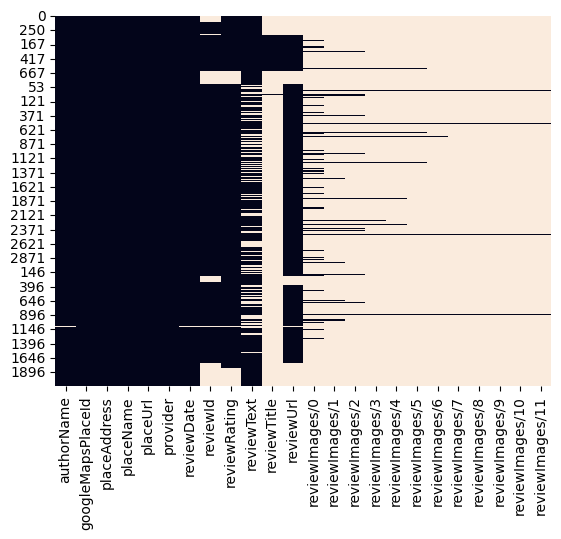

In [42]:
# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False)

At first sight, it appears like the majority of the important columns are not missing data.

In [43]:
# Drop rows with missing reviewText
df = df.dropna(subset=['reviewText'], axis=0)

In [49]:
def create_place_review_pivot(df):
    # Count places per provider
    provider_place_counts = df.groupby(['provider', 'placeName']).size().reset_index(name='place_count')
    # Count reviews per place
    place_review_counts = df.groupby(['provider', 'placeName'])['reviewText'].count().reset_index(name='review_count')
    # Merge the two dataframes
    merged_counts = pd.merge(provider_place_counts, place_review_counts, on=['provider', 'placeName'])
    
    pivot = pd.pivot_table(
        merged_counts, 
        values='review_count',
        index='placeName',
        columns='provider',
        aggfunc='sum',
        fill_value=0
    )
    
    pivot['Total_Reviews'] = pivot.sum(axis=1)
    pivot = pivot.sort_values(by='Total_Reviews', ascending=False)
    
    return pivot


create_place_review_pivot(df)

provider,door-dash,google-maps,tripadvisor,uber-eats,Total_Reviews
placeName,,,,,
Home Frite,349,7,0,250,606
Red Lobster,0,397,0,0,397
Sound + Fury Brewery and Kitchen,0,101,0,0,101
Wynkoop Brewing Company,0,0,100,0,100
World Famous Dark Horse Bar,0,0,100,0,100
...,...,...,...,...,...
ANDO patisserie,0,1,0,0,1
White Horse Tavern - Financial District,0,1,0,0,1
West Bank Gourmet Deli in Battery Park,0,1,0,0,1


In [ ]:
# Number of unique reviews per place
df.groupby('placeName')['reviewText'].nunique().sort_values(ascending=False).head(20)

placeName
Home Frite                           432
Red Lobster                          394
Wynkoop Brewing Company              100
World Famous Dark Horse Bar          100
Bistro Vendome                       100
The Pub On The Bricks                 99
Priya's Indian Kitchen                91
Paris Baguette                        91
Sound + Fury Brewery and Kitchen      85
Petit Chou                            84
Craft House                           81
Dhaba                                 80
Randolph Beer                         76
Cafeteria                             72
Tres Amigos Taqueria & Restaurant     71
Crepe Stop                            68
Mangia                                68
La Churreria                          67
Pasticceria Rocco                     67
Other Half Brewing Company            66
Name: reviewText, dtype: int64

#### Finding Duplication

In [32]:
duplicate_reviews = df[df.duplicated(subset=['reviewText','authorName','reviewDate','provider'], keep=False)].sort_values(by='reviewText')
duplicate_reviews

,authorName,googleMapsPlaceId,placeAddress,placeName,placeUrl,provider,reviewDate,reviewId,reviewRating,reviewText,...,reviewImages/2,reviewImages/3,reviewImages/4,reviewImages/5,reviewImages/6,reviewImages/7,reviewImages/8,reviewImages/9,reviewImages/10,reviewImages/11
1752,Tiffanie L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-23T21:30:43.356Z,NaN,1.0,The Orchard Cobb Salad was nothing more than ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tiffanie L,ChIJAQReQIdZwokR1rcwiar_XqM,"Orchard Grocer, 78 Orchard St, New York, NY 10...",Orchard Grocer,https://page-service.doordash.com/store/orchar...,door-dash,2024-04-23T21:30:43.356Z,NaN,1.0,The Orchard Cobb Salad was nothing more than ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,Malèah D,ChIJl0yGbJRbwokRU009ugxm0CA,"1047 Bedford Ave, Brooklyn, NY 11216, USA",Home Frite,https://page-service.doordash.com/store/home-f...,door-dash,2023-09-30T12:55:50.259Z,NaN,5.0,10/10 my fav burger spot. I eat here at least ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Malèah D,ChIJl0yGbJRbwokRU009ugxm0CA,"1047 Bedford Ave, Brooklyn, NY 11216, USA",Home Frite,https://page-service.doordash.com/store/home-f...,door-dash,2023-09-30T12:55:50.259Z,NaN,5.0,10/10 my fav burger spot. I eat here at least ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1146,jason “factual” rivera,ChIJPbvLQdJZwokRscx7HQBG6vM,"11 W 32nd St, New York, NY 10001",Sweet Churros,https://www.google.com/maps/search/?api=1&quer...,google-maps,2025-03-08T13:03:11.556Z,ChZDSUhNMG9nS0VJQ0FnTURRME0yYkpnEAE,5.0,A great place to end up in a diabetic coma all...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,NaN,ChIJy7OCeYv0wokRzRvj0SDsMDE,"921 E Tremont Ave Ste A, Bronx, NY 10460",Domino's Pizza,https://www.google.com/maps/search/?api=1&quer...,google-maps,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1263,George V,ChIJDUW-a1VYwokR4XGhIeW6Dao,"125 W 43rd St, New York, NY 10036",BXL Cafe,https://www.google.com/maps/search/?api=1&quer...,google-maps,2025-03-13T22:37:08.283Z,ChdDSUhNMG9nS0VJQ0FnTURRazczcWtnRRAB,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1270,Carine Matine,ChIJ3fVhj0BcwokRwvVTZEMd1tM,"1413 Bushwick Ave, Brooklyn, NY 11207",Salud Bar & Grill,https://www.google.com/maps/search/?api=1&quer...,google-maps,2025-03-13T21:30:26.575Z,ChdDSUhNMG9nS0VJQ0FnTURRay16aXh3RRAB,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273,NaN,ChIJk3c1OuDywokRH1rMyKAoU7M,"4265 Katonah Ave, Bronx, NY 10470",CTown Supermarkets,https://www.google.com/maps/search/?api=1&quer...,google-maps,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A duplicate is a row that has more than one occurrence according to the following columns `reviewText`,`authorName`,`reviewDate`,`provider`.

This is most likely the result of scarpping in the dataframe. 

In [33]:
df = df.drop_duplicates(subset=['reviewText', 'authorName', 'reviewDate', 'provider'], keep='first')

#### Data Distribution

<Axes: title={'center': 'Provider Distribution'}, ylabel='count'>

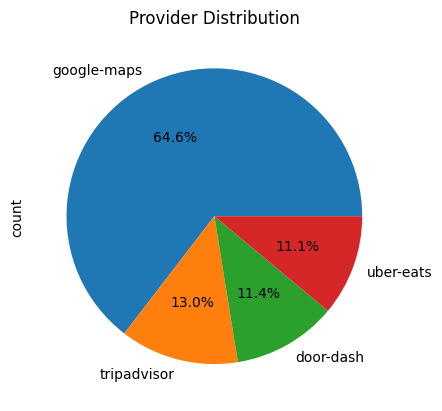

In [73]:

df['provider'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Provider Distribution')

<Axes: title={'center': 'Review Text Length Distribution'}, ylabel='Frequency'>

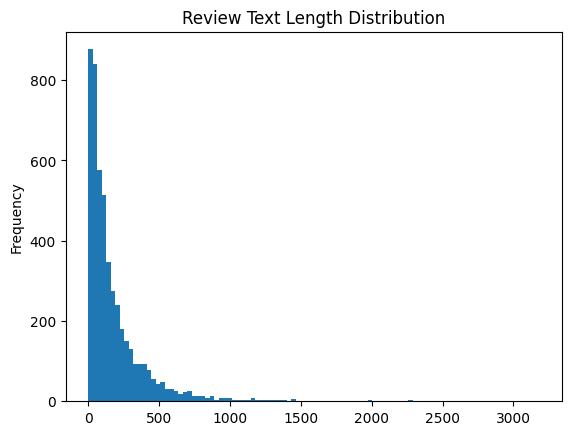

In [74]:
df['reviewText'].str.len().plot(kind='hist', bins=100, title='Review Text Length Distribution')

array([[<Axes: title={'center': 'reviewRating'}>]], dtype=object)

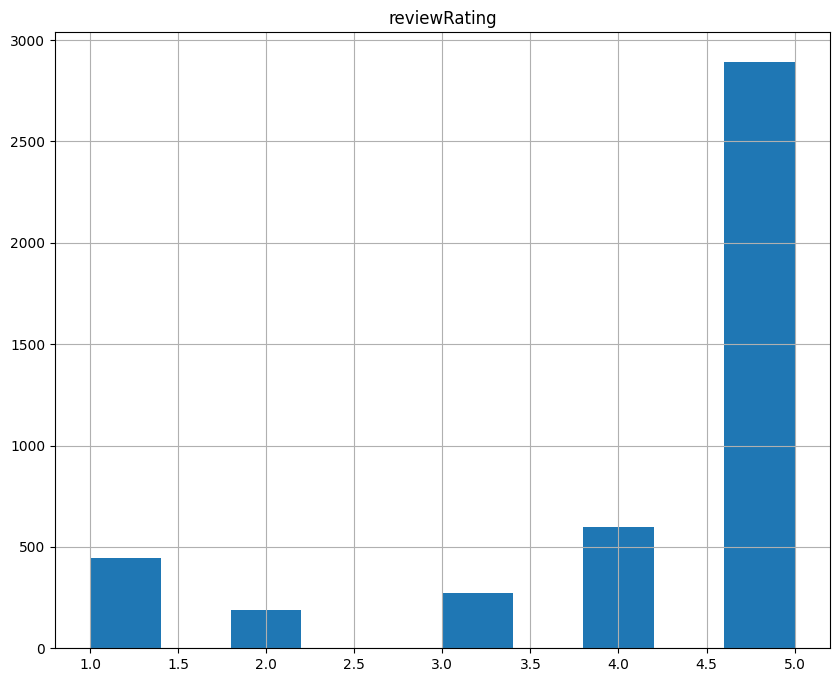

In [75]:
df.hist(figsize=(10,8))

Seems like the majority of the data is rank 5 star, which may indicate on positive reviews biased